# Métodos de _clustering_

Da mesma forma que podemos especificar diferentes métricas de distância, podemos também especificar diferentes métodos de agregação, que com base na distância entre os vários pontos vão determinar de que forma podem ser agrupados: de que forma se determina a ligação entre eles.

O valor por omissão usado pela função `linkage` o da ligação `single`, determinada pela distância mínima entre os pontos mais próximos  $ \min \,\{\,d(a,b):a\in A,\,b\in B\,\} $; uma alternativa bastante comum e que determina os _cluster_ com base na distância média é o `average` (também conhecido por UPGMA), e outra é o método de Ward `{cite}`pennsylvaniastateuniversity14WardMethod`

Podemos ver a diferença entre os três com o seguinte exemplo; adicionamos um partido ("B") normalmente se abstem mas vota duas vezes de forma diferente, ambas em sentido oposto ao partido "A".

In [1]:
import pandas as pd
from scipy.spatial.distance import squareform
from scipy.spatial.distance import pdist
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import scipy.spatial as sp, scipy.cluster.hierarchy as hc
%matplotlib inline

In [2]:
v5=[[1,1,1,1,1,1,1,1,1,1],[0,0,0,1,0,-1,0,-1,-1,-1],[0,0,0,-1,0,0,0,0,0,1],[-1,-1,-1,-1,-1,-1,-1,-1,-1,-1]]

v5_df = pd.DataFrame(v5, columns=["v1","v2", "v3","v4","v5","v6","v7","v8","v9","v10"], index=["F","A","B" ,"C"])
v5_distmat=pd.DataFrame(squareform(pdist(v5)), columns=v5_df.index, index=v5_df.index)
v5_distmat

,F,A,B,C
F,0.000000,4.582576,3.464102,6.324555
A,4.582576,0.000000,3.316625,3.000000
B,3.464102,3.316625,0.000000,3.464102
C,6.324555,3.000000,3.464102,0.000000


## _Single (Nearest Point)_

Usando o método _single_ obtemos o seguinte dendograma:

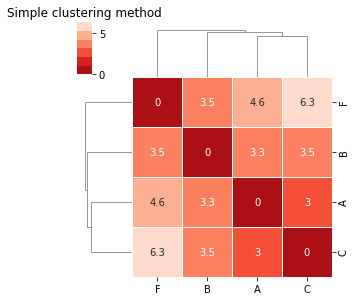

In [3]:
v5_distmat_link = hc.linkage(pdist(v5_df))

sns.clustermap(
    v5_distmat,
    annot = True,
    cmap=sns.color_palette("Reds_r"),
    linewidth=1,
    row_linkage=v5_distmat_link,
    col_linkage=v5_distmat_link,
    figsize=(4,4)
)
plt.title('Simple clustering method')

plt.show()

## _Average (UPGMA)_

Usando UPGMA não há alterações (neste caso muito simples, porque o mais provável é existirem quando aplicadas a dados reais com maior número de observações e dimensões); os agrupamentos tendem a ser feitos de forma recursiva, por separação de elementos individuais até à identificação de um par final:

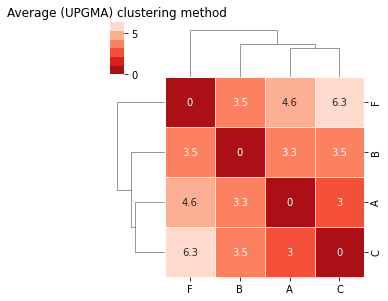

In [4]:
v5_distmat_link = hc.linkage(pdist(v5_df), method="average")

sns.clustermap(
    v5_distmat,
    annot = True,
    cmap=sns.color_palette("Reds_r"),
    linewidth=1,
    row_linkage=v5_distmat_link,
    col_linkage=v5_distmat_link,
    figsize=(4,4)
)
plt.title('Average (UPGMA) clustering method')

plt.show()

## Método de Ward

Com o método de Ward o resultado não é muito diferente mas tende a agrupar em _clusters_ de número e dimensões iguais e é por isso uma escolha muito popular *(Morse 1980)*; neste caso cria dois grupos de dois elementos, agrupando o novo partido pela consideração que faz das destâncias entre todos:

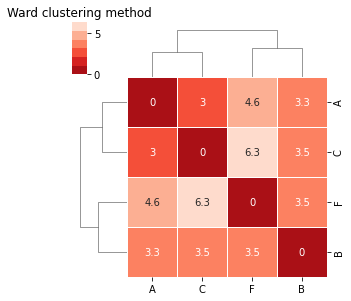

In [5]:
v5_distmat_link = hc.linkage(pdist(v5_df), method="ward")

sns.clustermap(
    v5_distmat,
    annot = True,
    cmap=sns.color_palette("Reds_r"),
    linewidth=1,
    row_linkage=v5_distmat_link,
    col_linkage=v5_distmat_link,
    figsize=(4,4)
)
plt.title('Ward clustering method')

plt.show()

Servem estes exemplos para mostrar que a forma como se procede ao agrupamento é resultado de várias decisões, e se em geral o resultado é o mesmo para valores mais distantes, podem ter resultados diferentes para diferenºas mais pequenas.